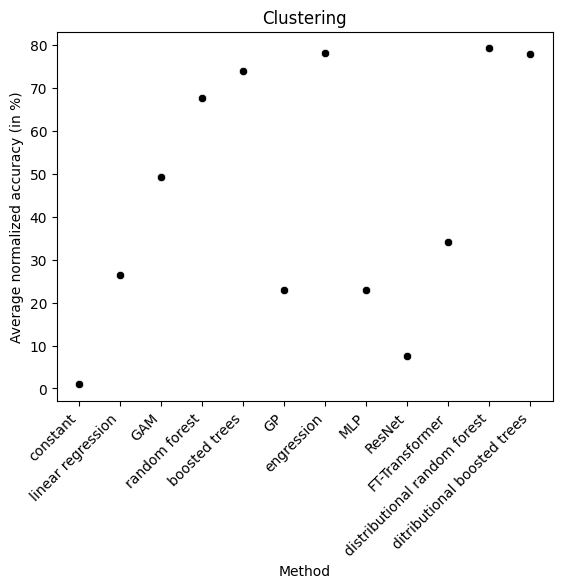

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.transforms import Bbox

directory = r'RESULTS/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = np.nanmin(CRPS)
        mid_CRPS = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_CRPS_only_num_features_normalized_accuracy.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

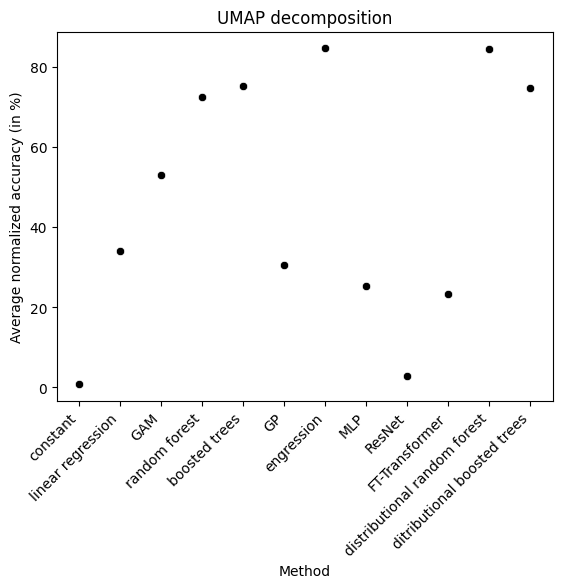

In [2]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = np.nanmin(CRPS)
        mid_CRPS = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

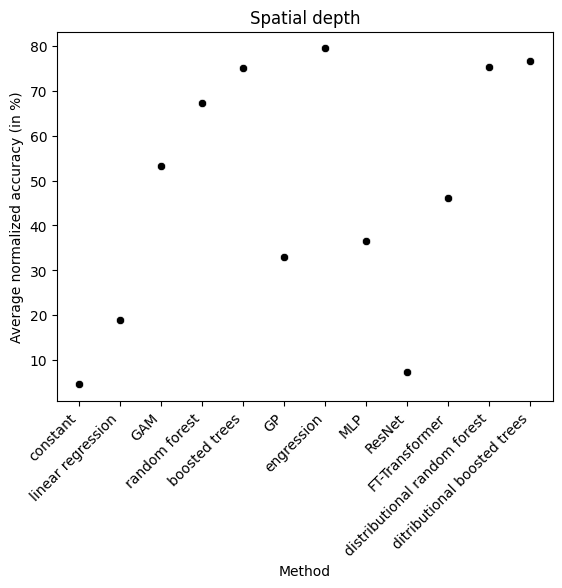

In [3]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = np.nanmin(CRPS)
        mid_CRPS = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

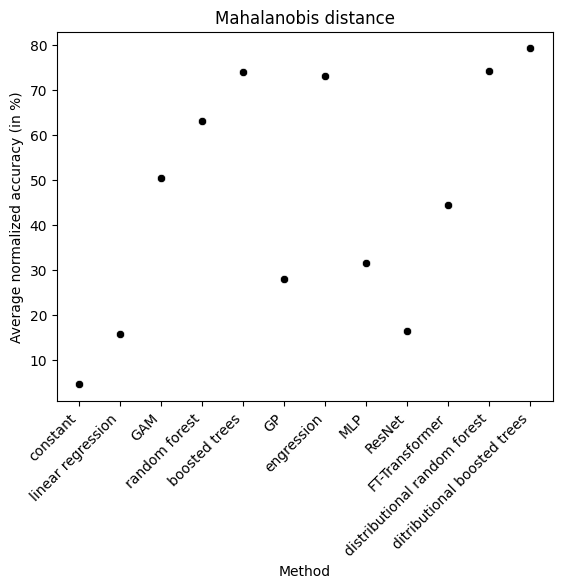

In [4]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = np.nanmin(CRPS)
        mid_CRPS = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

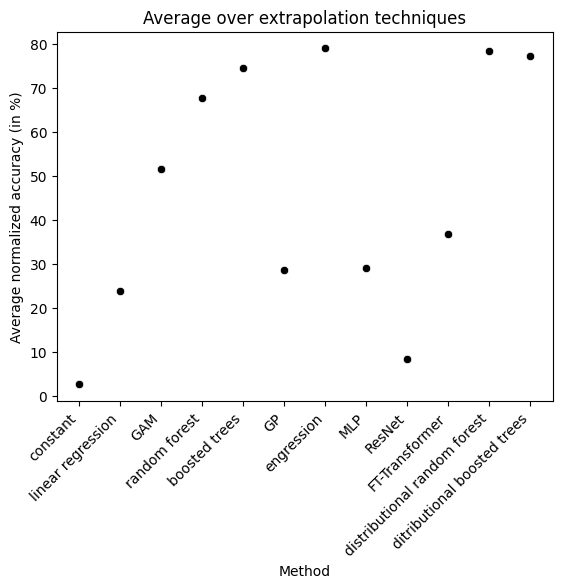

In [5]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            CRPS = table['CRPS']
            CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
            second_largest = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[1]
            CRPS[CRPS > 5 * second_largest] = np.nan
            lowest_CRPS = np.nanmin(CRPS)
            mid_CRPS = sorted(CRPS[np.isnan(CRPS)==0], reverse=True)[2]
            df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()